## California Regression Activity 

### Description

Practice linear regressions

### Grading

For grading purposes, we will clear all outputs from all your cells and then run them all from the top.  Please test your notebook in the same fashion before turning it in.

### Submitting Your Solution

To submit your notebook, first clear all the cells (this won't matter too much this time, but for larger data sets in the future, it will make the file smaller).  Then use the File->Download As->Notebook to obtain the notebook file.  Finally, submit the notebook file on Canvas

In [2]:
import numpy as np
import pandas as pd
import sklearn as sk
import sklearn.datasets
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from pandas import DataFrame

## Procedure

For this activity, you are going to make an initial guess or hypothesis about which features best represent the California dataset. You are first going to perform a regression of just a subset of the features you choose, then you are going to perform a regression with all of the features.  The steps for performing a linear regression with sciKit learn are as follows: 
 1. Load Data (Which includes separating the data into X and y)
 2.Do some initial visualizations (e.g., scatter plots or visualizations with 2 or 3 features or a feature vs. the target, maybe some histograms).
 3. Split data using train_test_split()
 4. Create lr object
 5. Train the lr model
 6. Test the lr model
 
Note: You do NOT need to do final visualizations like when we used simulated data.

Compare the results of both models and discuss why you think one performed better than the other.

### Load the California Housing Dataset

In [3]:
from sklearn.datasets import fetch_california_housing    
housing = fetch_california_housing()
data = pd.DataFrame(data=housing.data, columns=housing.feature_names)
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [3]:
data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


### Hypothesis

What is your hypothesis?

Answer: I think performing a regression on all the features of a dataset is better than selecting a subset of certain features.

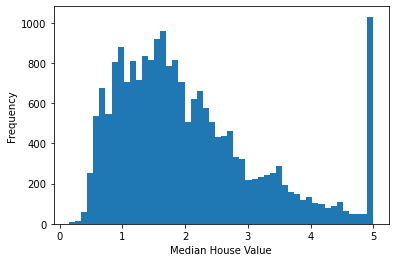

(14448, 3)

In [8]:
#Load dataset
X = data[['AveBedrms','Population','HouseAge']]
y = housing.target
# data['Target'] = housing.target
# data[:10]

plt.hist(y, bins=50)
plt.xlabel("Median House Value")
plt.ylabel("Frequency")
plt.show()

#Split data into testing and training 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3) # how much data to pull
X_train.shape

In [11]:
#Create lr object
lr = LinearRegression()

#Train model
lr.fit(X_train, y_train)
#Test model
print("Accuracy Score:", lr.score(X_test, y_test))

y_pred = lr.predict(X_test)

MSE = ((y_test - lr.predict(X_test)) ** 2).mean()
RMSE = np.sqrt(MSE)

print("MSE: ", MSE)
print("RMSE:", RMSE)

Accuracy Score: 0.01623657412840307
MSE:  1.3015827119275183
RMSE: 1.1408692790707962


### Full Dataset

In [6]:
#Load dataset
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = pd.DataFrame(housing.target, columns=["target"])

#Split data into testing and training 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)


In [12]:
#Create lr object
lr = LinearRegression()

#Train model
lr.fit(X_train, y_train)

#Test model 
y_pred = lr.predict(X_test)
print("Accuracy Score:", lr.score(X_test, y_test))

MSE = ((y_test - lr.predict(X_test)) ** 2).mean()
RMSE = np.sqrt(MSE)

print("MSE: ", MSE)
print("RMSE:", RMSE)

Accuracy Score: 0.01623657412840307
MSE:  1.3015827119275183
RMSE: 1.1408692790707962


### Discussion

Which result is better, and why?

Answer: The full dataset seems to be better. The RMSE and the MSE of the full dataset is smaller compared to the RMSE and MSE of the subset feature. A lower RMSE indicates a better fit. With a full set you get more features than a subset.